## Курсовая работа по дисциплине Структуры и алгоритмы обработки данных


## Выполнила студентка группы БФИ2001
## Тимофеева Дарья Валерьевна

### Задание:

Необходимо найти решение нескольких задач в соответствии с вариантом. 

Каждая задача имеет стоимость в 2 балла. Итоговая оценка выставляется в соответствии с таблицей:

Кол-во баллов | Оценка
:-------- |:-----
0-10 | Неудовлетворительно
12-14 | Удовлетворительно
16-18| Хорошо
20 | Отлично

## Вариант 22 
### Задача 1
Вам задано целое положительное число 𝑛. За один ход вы можете увеличить 𝑛 на единицу (то есть сделать 𝑛:=𝑛+1). Ваша задача — найти минимальное количество ходов, которое надо совершить, чтобы сделать сумму цифр 𝑛 не превышающей 𝑠.

Вам необходимо ответить на 𝑡 независимых наборов тестовых данных.

Входные данные\
Первая строка входных данных содержит одно целое число 𝑡 (1≤𝑡≤2⋅104) — количество наборов тестовых данных. Затем следуют 𝑡 наборов тестовых данных.

Единственная строка набора тестовых данных содержит два целых числа 𝑛 и 𝑠 (1≤𝑛≤1018; 1≤𝑠≤162).

Выходные данные\
На каждый набор тестовых данных выведите ответ: минимальное количество ходов, которое надо совершить, чтобы сделать сумму цифр 𝑛 не превышающей 𝑠.

Пример\
входные данные\
5\
2 1\
1 1\
500 4\
217871987498122 10\
100000000000000001 1\
выходные данные\
0\
500\
2128012501878\
899999999999999999

In [27]:
#1
#функция, вычисляющая сумму цифр числа
def sum_of_numbers (x):
    sum = 0
    while x > 0:
        sum += x % 10
        x = int(x // 10)
    return sum

def task1(num, s):
    moves = 0
    if sum_of_numbers(num) <= s: #если изначальное значение num подходит под ограничения, возвращаем 0
        return 0
    pw = 1
    for i in range(18):
        digit = (num // pw) % 10 # вычисляем цифру, которую нужно выставить в нуль
        add = pw * ((10 - digit) % 10) # вычисляем кол-во ходов, необходимых, чтобы обратить найденную цифру в нуль
        num+= int(add) # добавляем полученный рез-т к num
        moves += int(add) # считаем кол-во ходов
        if (sum_of_numbers(num) <= s): # если полученное число num подходит под ограничения, завершаем 
            break
        pw *= 10 # если num не подходит под ограничения, переходим к след-й цифре
    return moves # возвращаем кол-во ходов


# Ввод данных, проверка корректности ввода и вызов функции 
results = [] # массив для записи выходных данных
print('Входные данные:')
t = input('Введите число t - количество наборов тестовых данных (1≤𝑡≤2⋅10^4): ')
if not t.isdigit(): # является ли t целым числом
    print('Введенно не целое число!')
else:
    t = int(t)
    if not 1 <= t <= 2 * (10 ** 4): # подходит ли t под требуемый диапазон
        print('Введенное число t находится вне требуемого диапазона!')
    else:
        for i in range(t):
            data = input('Введите два числа 𝑛 и 𝑠 (1≤𝑛≤10^18; 1≤𝑠≤162): ').split(' ') # ввод n и s
            if len(data) == 2: # точно ли введены ровно два числа
                n = data[0]
                s = data[1]
                if (n.isdigit() and s.isdigit()): # являются ли n и s целыми числами
                    n = int(n)
                    s = int(s)
                    if ((1 <= n <= 10**18) and (1 <= s <= 162)): # подхотяд ли n и s под требуемые диапазоны
                        res = task1(n, s) # если все данные были введены корректно, вызывается функция task1
                        results.append(res) # запись результата работы ф-и для очередного набора данных в массив результатов
                    else:
                        print('Введенное число находится вне требуемого диапазона!')
                        break
                else:
                    print('Введено не целое число!')
                    break
            else:
                print('Введено больше или меньше двух чисел!')
                break

if len(results) != 0:
    print('Выходные данные:')                       
    print("\n".join(str(x) for x in results))

Входные данные:
Введите число t - количество наборов тестовых данных (1≤𝑡≤2⋅10^4): 5
Введите два числа 𝑛 и 𝑠 (1≤𝑛≤10^18; 1≤𝑠≤162): 2 1
Введите два числа 𝑛 и 𝑠 (1≤𝑛≤10^18; 1≤𝑠≤162): 1 1
Введите два числа 𝑛 и 𝑠 (1≤𝑛≤10^18; 1≤𝑠≤162): 500 4
Введите два числа 𝑛 и 𝑠 (1≤𝑛≤10^18; 1≤𝑠≤162): 217871987498122 10
Введите два числа 𝑛 и 𝑠 (1≤𝑛≤10^18; 1≤𝑠≤162): 100000000000000001 1
Выходные данные:
8
0
500
2128012501878
899999999999999999


### Задача 2
Назовем левым циклическим сдвигом некоторой строки 𝑡1𝑡2𝑡3…𝑡𝑛−1𝑡𝑛 следующую строку: 𝑡2𝑡3…𝑡𝑛−1𝑡𝑛𝑡1.

Аналогично, назовем правым циклическим сдвигом строки 𝑡 строку 𝑡𝑛𝑡1𝑡2𝑡3…𝑡𝑛−1.

Скажем, что строка 𝑡 является хорошей, если ее левый циклический сдвиг равен правому циклическому сдвигу.

Вам дана строка 𝑠, состоящая из цифр 0–9.

Какое минимальное количество символов необходимо удалить из строки 𝑠, чтобы она стала хорошей?

Входные данные
Первая строка содержит единственное целое число 𝑡 (1≤𝑡≤1000) — количество наборов входных данных.

Следующие 𝑡 строк содержат описание наборов входных данных. Первая и единственная строка каждого набора содержит строку 𝑠 (2≤|𝑠|≤2⋅105). Каждый символ 𝑠𝑖 является цифрой 0–9.

Гарантируется, что суммарная длина строк не превышает 2⋅105.

Выходные данные\
Для каждого набора входных данных выведите минимальное количество символов, которое необходимо удалить из строки 𝑠, чтобы она стала хорошей.

Пример\
входные данные\
3\
95831\
100120013\
252525252525\
выходные данные\
3\
5\
0\
Примечание\
В первом примере можно стереть любые 3 символа, например 1-й, 3-й и 4-й. Вы получите строку 51, и это хорошая строка.

Во втором примере можно стереть все символы, кроме 0: оставшаяся строка 0000 — хорошая.

В третьем примере заданная строка 𝑠 уже является хорошей.

In [28]:
#2
def task2(s):
    l = [0]*10 # массив, в который будем записывать кол-во каждого символа в строке
    count = len(s)
    answer = count # кол-во символов, которые необходимо удалить
    
    for k in range(len(s)):
        l[int(s[k])] += 1 # количество различных элементов в строке
    
    # перебираем пары чисел
    # если элемента нет, пропускаем его
    for i in range(10): 
        if l[i] == 0:
            continue
        for j in range (10):
            if l[j] == 0:
                continue
            elif i == j: # если все числа в строке равны
                if count - l[i] < answer:
                    answer = count - l[i]
            else:
                len_str = alternating(i, j, s, count) # длина строки с чередующимися числами
                if count - len_str < answer and len_str % 2 == 0: # длина оставшейся строки должна быть четной
                    answer = count - len_str
    return answer

# функция вычисляющая максимальную длину строки с чередованием чисел
def alternating(index1, index2, s, leng):
    answer = 0
    for i in range (leng):
        if int(s[i]) == index1:
            index1, index2 = index2, index1
            answer += 1
    return answer 

# функция, проверяюшая правильность элементов введенной строки s
def check_str(s):
    string = '0123456789'
    for i in s:
        if i not in string:
            return False
    return True

# Ввод данных, проверка корректности ввода и вызов функции 
results = [] # массив для записи выходных данных
s_sum_len = 0
print('Входные данные:')

t = input('Введите число t - количество наборов тестовых данных (1≤𝑡≤1000): ')
if not t.isdigit(): # является ли t целым числом
    print('Введенно не целое число!')
else:
    t = int(t)
    if not 1 <= t <= 1000: # подходит ли t под требуемый диапазон
        print('Введенное число t находится вне требуемого диапазона!')
    else:
        for i in range(t):
            s = input('Введите строку из, состоящую из цифр 0 - 9: ')
            if 2<= len(s) <= 2*(10**5):
                s_sum_len += len(s)
                if s_sum_len <= 2*(10**5):
                    if check_str(s):
                        res = task2(s)
                        results.append(res)
                    else:
                        print('Введена некорректная строка s!')
                        break
                else:
                    print('Суммарная ддина строк превысила 2* 10^5!')
                    break
            else:
                print('Длина введенной строки некорректна!')
                break

if len(results) != 0:
    print('Выходные данные:')                       
    print("\n".join(str(x) for x in results))

Входные данные:
Введите число t - количество наборов тестовых данных (1≤𝑡≤1000): 3
Введите строку из, состоящую из цифр 0 - 9: 95831
Введите строку из, состоящую из цифр 0 - 9: 100120013
Введите строку из, состоящую из цифр 0 - 9: 252525252525
Выходные данные:
3
5
0


### Задача 3
Вам задана бинарная строка 𝑠, состоящая из 𝑛 нулей или единиц.

Ваша задача – разделить заданную строку на минимальное число подпоследовательностей таким образом, что каждый символ строки принадлежит ровно одной подпоследовательности и каждая подпоследовательность выглядит подобно «010101 ...» или «101010 ...» (т.е. подпоследовательность не должна содержать два соседних нуля или единицы).

Напомним, что подпоследовательность — это последовательность, которая может быть получена путем удаления из заданной последовательности с помощью удаления нуля или более элементов без изменения порядка остальных элементов. Например, подпоследовательностями «1011101» являются «0», «1», «11111», «0111», «101», «1001», но не «000», «101010» и «11100».

Вам необходимо ответить на 𝑡 независимых наборов тестовых данных.

Входные данные\
Первая строка теста содержит одно целое число 𝑡 (1≤𝑡≤2⋅104) — количество наборов тестовых данных. Затем следуют 𝑡 наборов тестовых данных.

Первая строка набора тестовых данных содержит одно целое число 𝑛 (1≤𝑛≤2⋅105) — длину 𝑠. Вторая строка набора тестовых данных содержит 𝑛 символов '0' и '1' — строку 𝑠.

Гарантируется, что сумма всех 𝑛 не превосходит 2⋅105 (∑𝑛≤2⋅105).

Выходные данные\
Для каждого набора тестовых данных выведите ответ на него: первой строкой выведите одно целое число 𝑘 (1≤𝑘≤𝑛) — минимальное количество подпоследовательностей, на которые вы можете разделить строку 𝑠. Второй строкой выведите 𝑛 целых чисел 𝑎1,𝑎2,…,𝑎𝑛 (1≤𝑎𝑖≤𝑘), где 𝑎𝑖 — номер подпоследовательности, к которой принадлежит 𝑖-й символ строки 𝑠.

Если существует несколько ответов, вы можете вывести любой.

Пример\
входные данные\
4\
4\
0011\
6\
111111\
5\
10101\
8\
01010000\
выходные данные\
2\
1 2 2 1 \
6\
1 2 3 4 5 6 \
1\
1 1 1 1 1 \
4\
1 1 1 1 1 2 3 4 

In [29]:
#3
def task3(n, s):
    sub_seq_0 = [] # для хранение индексов подпоследовательностей, которые заканчиваются на '0'
    sub_seq_1 = [] # для хранение индексов подпоследовательностей, которые заканчиваются на '1'
    ans = [0]*n
    for i in range(n):
        new_pos = len(sub_seq_0) + len(sub_seq_1)
        if s[i] == '0': # если в строке s встречаем нуль
            if len(sub_seq_1) == 0: # если не существует послед-ти, которая заканчивается на 1 
                sub_seq_0.append(new_pos) # создаем новую послед-ть, которая заканчивается на 0
            else:
                new_pos = sub_seq_1[len(sub_seq_1) - 1] # дописываем 0 к существующей послед-ти, к-я заканчивается на 1
                sub_seq_1.pop()
                sub_seq_0.append(new_pos)
        else: # если в строке встречатся не 0
            if len(sub_seq_0) == 0:  # если не существует послед-ти, которая заканчивается на 0 
                sub_seq_1.append(new_pos) # создаем новую послед-ть, которая заканчивается на 1
            else:
                new_pos = sub_seq_0[len(sub_seq_0) - 1] # дописываем 1 к существующей послед-ти, к-я заканчивается на 0
                sub_seq_0.pop()
                sub_seq_1.append(new_pos)
        ans[i] = str(new_pos + 1) # сохраняем № подпосл-ти, к к-1 принадлежит каждый символ
    return (len(sub_seq_0) + len(sub_seq_1)), ans

# функция, проверяющая правильность символов в вводимой строке s
def check_str(s):
    for i in s:
        if i != '0' and i != '1':
            return False
    return True

# Ввод данных, проверка корректности ввода и вызов функции 
results = [] # массив для записи выходных данных

print('Входные данные:')

t = input('Введите число t - количество наборов тестовых данных (1≤𝑡≤2⋅10^4): ')
n_sum = 0
if not t.isdigit(): # является ли t целым числом
    print('Введенно не целое число!')
else:
    t = int(t)
    if not 1 <= t <= 2 * (10 ** 4): # подходит ли t под требуемый диапазон
        print('Введенное число t находится вне требуемого диапазона!')
    else:
        for i in range(t):
            n = input('Введите целое число 𝑛 (1≤𝑛≤2⋅10^5) — длину 𝑠: ')
            if n.isdigit(): # является ли n  целым числом
                n = int(n)
                if 1 <= n <= 2*(10**5): # подходит ли n под требуемый диапазон
                    n_sum += n
                    if n_sum <= 2*(10**5):
                        s = input('Введите ' + str(n)+ ' символов 0 и 1 — строку 𝑠: ')
                        if len(s) == n: # совпадает ли длина введенной строки с указанной ранее длиной
                            if check_str(s): # состоит ли строка s только из символов 0 и 1
                                res = task3(n, s)  # если все данные были введены корректно, вызывается функция task3

                                # запись результатов работы ф-и для очередного набора данных в массив результатов
                                results.append(res[0])  
                                results.append(" ".join(res[1]))
                            else:
                                print('Введенная строка некорректна!')
                                break
                        else:
                            print('Длина введенной строки некорректна!')
                            break
                    else:
                        print('Сумма введенных n превысила 2 * 10^4!')
                        break
                else:
                    print('Введенное число находится вне требуемого диапазона!')
                    break
            else:
                print('Введено не целое число!')
                break

if len(results) != 0:
    print('Выходные данные:')                       
    print("\n".join(str(x) for x in results))

Входные данные:
Введите число t - количество наборов тестовых данных (1≤𝑡≤2⋅10^4): 4
Введите целое число 𝑛 (1≤𝑛≤2⋅10^5) — длину 𝑠: 4
Введите 4 символов 0 и 1 — строку 𝑠: 0011
Введите целое число 𝑛 (1≤𝑛≤2⋅10^5) — длину 𝑠: 6
Введите 6 символов 0 и 1 — строку 𝑠: 111111
Введите целое число 𝑛 (1≤𝑛≤2⋅10^5) — длину 𝑠: 5
Введите 5 символов 0 и 1 — строку 𝑠: 10101
Введите целое число 𝑛 (1≤𝑛≤2⋅10^5) — длину 𝑠: 8
Введите 8 символов 0 и 1 — строку 𝑠: 01010000
Выходные данные:
2
1 2 2 1
6
1 2 3 4 5 6
1
1 1 1 1 1
4
1 1 1 1 1 2 3 4


### Задача 4
Патрик любит играть в бейсбол, но иногда он тратит так много часов на пробежки, что его разум начинает затуманиваться! Патрик уверен, что его набранные очки за 𝑛 игр соответствуют тождественной перестановке (т.е. в первой игре он набирает 1, во второй игре он набирает 2 и так далее). Однако, когда он посмотрел на свои записи, он увидел, что все значения перепутаны!

Определим специальный обмен следующим образом: выберите любой подмассив очков и переставьте местами его элементы так, чтобы ни один элемент не оказался в той же позиции, где он был до обмена. Например, выполнение специального обмена на [1,2,3] может дать [3,1,2], но не может дать [3,2,1], так как 2 находится в той же позиции.

Вам дана перестановка из 𝑛 целых чисел. Пожалуйста, помогите Патрику найти минимальное количество специальных обменов, необходимых для того, чтобы сделать ее отсортированной! Можно доказать, что при данных ограничениях это число не превышает 1018.

Массив 𝑎 является подмассивом массива 𝑏, если 𝑎 можно получить из 𝑏, удалив несколько (возможно, ноль или все) элементов из начала и несколько (возможно, ноль или все) элементов с конца.

Входные данные\
Каждый тест содержит несколько наборов входных данных. Первая строка содержит количество наборов входных данных 𝑡 (1≤𝑡≤100). Описание наборов входных данных приведено ниже.

Первая строка каждого набора входных данных содержит целое число 𝑛 (1≤𝑛≤2⋅105)  — длину данной перестановки.

Вторая строка каждого набора входных данных содержит 𝑛 целых чисел 𝑎1,𝑎2,...,𝑎𝑛 (1≤𝑎𝑖≤𝑛)  — начальную перестановку.

Гарантируется, что сумма 𝑛 по всем наборам входных данных не превышает 2⋅105.

Выходные данные\
Для каждого набора входных данных выведите одно целое число: минимальное количество специальных обменов, необходимых для сортировки перестановки.

Пример\
входные данные\
2\
5\
1 2 3 4 5\
7\
3 2 4 5 1 6 7\
выходные данные\
0\
2\
Примечание\
Первая перестановка она уже отсортирована, поэтому обмены не нужны.

Можно показать, что для сортировки второй перестановки нужно как минимум 2 обмена.

[3,2,4,5,1,6,7]\
Сделаем специальный обмен для диапазона (1,5)

[4,1,2,3,5,6,7]\
Сделаем специальный обмен для диапазона (1,4)

[1,2,3,4,5,6,7]

In [30]:
#4
def task4(n, a):
    if a == sorted(a): # перестановка уже отсортирована
        return 0       # значит никаких обменов не требуется
    else:
        answer = 1
        b = []
        for i in range(n):      # просматриваем все элементы
            if a[i] != (i + 1): # если число находится не на своей позици
                b.append(i)     # собираем индексы такиx числа в отдельный список
        for j in range(1, len(b)):
            if b[j] - b[j-1] != 1: # если разница м-у индексами двух соседних чисел не 1
                answer += 1
                break
    return(answer)

# функция, проверяюшая являются ли введенные элементы числами
def check_1(s):
    for i in s:
        if i.isdigit():
                return True
    return False

# функция, проверяюшая подходят ли элементы под требуемый диапазон
def check(l,n):
    for i in l:
        if 1<= i <= n:
            return True
    return False

# Ввод данных, проверка корректности ввода и вызов функции 
results = [] # массив для записи выходных данных
print('Входные данные:')
t = input('Введите число t - количество наборов тестовых данных (1≤𝑡≤100): ')
n_sum = 0
if not t.isdigit(): # является ли t целым числом
    print('Введенно не целое число!')
else:
    t = int(t)
    if not 1 <= t <= 100: # подходит ли t под требуемый диапазон
        print('Введенное число t находится вне требуемого диапазона!')
    else:
        for i in range(t):
            n = input('Введите целое число 𝑛 (1≤𝑛≤2⋅105) — длину данной перестановки: ')
            if n.isdigit(): # является ли n целым числом
                n = int(n)
                if 1<= n <= 2 *(10**5): # подходит ли n под требуемый диапазон
                    n_sum += n
                    if n_sum <= 2 *(10**5):
                        a = input('Введите 𝑛 целых чисел (1≤𝑎𝑖≤𝑛) — начальную перестановку: ').split(' ')
                        if len(a) == n:
                            if check_1(a): # являются ли элементы целыми числами
                                a = list(map(int, a)) # преобразуем строку в список
                                if check(a, n):
                                    res = task4(n, a)
                                    results.append(res)
                                else:
                                    print('Введенные числа находятся вне требуемого диапазона!')
                                    break
                            else:
                                print('Введены не целые числа!')
                                break
                        else:
                            print('Количество элементов не совпадает с указанным ранее!')
                            break
                    else:
                        print('Сумма введенных n превысила 2*10^4!')
                        break
                else:
                    print('Введенное число находится вне требуемого диапазона!')
                    break
            else:
                print('Введено не целое число!')
                break
                
if len(results) != 0:
    print('Выходные данные:')                       
    print("\n".join(str(x) for x in results))


Входные данные:
Введите число t - количество наборов тестовых данных (1≤𝑡≤100): 2
Введите целое число 𝑛 (1≤𝑛≤2⋅105) — длину данной перестановки: 5
Введите 𝑛 целых чисел (1≤𝑎𝑖≤𝑛) — начальную перестановку: 1 2 3 4 5
Введите целое число 𝑛 (1≤𝑛≤2⋅105) — длину данной перестановки: 7
Введите 𝑛 целых чисел (1≤𝑎𝑖≤𝑛) — начальную перестановку: 3 2 4 5 1 6 7
Выходные данные:
0
2


### Задача 5
Вам дана строка 𝑠[1…𝑛], состоящая из строчных латинских букв. Гарантируется, что 𝑛=2𝑘 для некоторого целого числа 𝑘≥0.

Строка 𝑠[1…𝑛] называется 𝑐-хорошей, если выполняется как минимум одно из следующих условий:

Длина строки 𝑠 равна 1 и она состоит из единственного символа 𝑐 (то есть 𝑠1=𝑐);\
Длина строки 𝑠 больше 1, первая половина строки состоит только из символа 𝑐 (то есть 𝑠1=𝑠2=⋯=𝑠𝑛2=𝑐), а вторая половина строки (то есть строка 𝑠𝑛2+1𝑠𝑛2+2…𝑠𝑛) является (𝑐+1)-хорошей строкой;\
Длина строки 𝑠 больше 1, вторая половина строки состоит только из символа 𝑐 (то есть 𝑠𝑛2+1=𝑠𝑛2+2=⋯=𝑠𝑛=𝑐), а первая половина строки (то есть строка 𝑠1𝑠2…𝑠𝑛2) является (𝑐+1)-хорошей строкой.\
Например: «aabc» является 'a'-хорошей, «ffgheeee» является 'e'-хорошей.

За один ход вы можете выбрать один индекс 𝑖 от 1 до 𝑛 и заменить 𝑠𝑖 на любую строчную латинскую букву (любой символ от 'a' до 'z').

Ваша задача — найти минимальное количество ходов, необходимое, чтобы получить 'a'-хорошую строку из 𝑠 (т.е. 𝑐-хорошую строку для 𝑐= 'a'). Гарантируется, что ответ всегда существует.

Вам нужно ответить на 𝑡 независимых наборов тестовых данных.

Еще один пример 'a'-хорошей строки является следующим. Например, рассмотрим строку 𝑠=«cdbbaaaa». Это 'a'-хорошая строка, потому что:

вторая половина строки («aaaa») состоит только из символов 'a';\
первая половина строки («cdbb») — 'b'-хорошая строка, потому что:\
вторая половина строки («bb») состоит только из символов 'b';\
первая половина строки («cd») — 'c'-хорошая строка, потому что:\
первая половина строки («c») состоит из единственного символа 'c';\
вторая половина строки («d») — 'd'-хорошая строка.\
Входные данные\
Первая строка теста содержит одно целое число 𝑡 (1≤𝑡≤2⋅104) — количество наборов тестовых данных. Затем следуют 𝑡 наборов тестовых данных.

Первая строка набора тестовых данных содержит одно целое число 𝑛 (1≤𝑛≤131 072) — длину 𝑠. Гарантируется, что 𝑛=2𝑘 для некоторого целого числа 𝑘≥0. Вторая строка набора тестовых данных содержит строку 𝑠, состоящую из 𝑛 строчных латинских букв.

Гарантируется, что сумма всех 𝑛 не превосходит 2⋅105 (∑𝑛≤2⋅105).

Выходные данные\
Для каждого набора тестовых данных выведите ответ на него — наименьшее количество ходов, необходимое, чтобы получить 'a'-хорошую строку 𝑠 (т.е. 𝑐-хорошую строку для 𝑐= 'a'). Гарантируется, что ответ существует.

Пример\
входные данные\
6\
8\
bbdcaaaa\
8\
asdfghjk\
8\
ceaaaabb\
8\
bbaaddcc\
1\
z\
2\
ac\
выходные данные\
0\
7\
4\
5\
1\
1

In [31]:
#5
def task5(n, s, c):
    if n == 1: # если строка состоит из одного символа 
        if s == c: # если s1 == c, строка уже является хорошей
            return 0
        else: 
            return 1 # s1 != c, требуется один ход, чтобы заменить s1 на с и полусить хорошую строку
    else: # если строка состоит из более одного символа 
        middle = n//2 # индекс среднего элемента
        left_str = s[:middle] # левая подстрока строки s
        right_str = s[middle:] # # индекс среднего элемента
        
        # считаем количество вхождений символа с в девую и пв правую подстроки
        count_l = 0
        count_r = 0
        for i in range(middle):
            if s[i] == c:
                count_l+=1
            if s[i+middle]== c:
                count_r+=1
        
        # считаем кол-во ходов, при к-м получим хорошую строку по 2 условию (1 половина - символы с, 2 половина - с+1 хо-я стр)
        count_left = task5(len(left_str), left_str, chr(ord(c)+1))
        count_left+=middle - count_r
        
        # считаем кол-во ходов, при к-м получим хорошую строку по 3 условию (1 половина - с+1 хо-я стр, 2 половина - символы с)
        count_right = task5(len(right_str), right_str, chr(ord(c)+1))
        count_right+=middle - count_l
        
    return min(count_left, count_right) # возвращаем минимальное кол-во ходов

# функция, проверяющая правильность символов в вводимой строке s
def check_str_1(s):
    string = 'abcdefghijklmnopqrstuvwxyz'
    for i in s:
        if i not in string:
            return False
    return True

# Ввод данных, проверка корректности ввода и вызов функции 
results = [] # массив для записи выходных данных
n_sum = 0
print('Входные данные:')

t = input('Введите число t - количество наборов тестовых данных (1≤𝑡≤2⋅10^4): ')
if not t.isdigit(): # является ли t целым числом
    print('Введенно не целое число!')
else:
    t = int(t)
    if not 1 <= t <= 2 * (10 ** 4): # подходит ли t под требуемый диапазон
        print('Введенное число t находится вне требуемого диапазона!')
    else:
        for i in range(t):
            n = input('Введите целое число 𝑛 (1≤𝑛≤131072) — длину 𝑠: ')
            if n.isdigit(): # является ли n  целым числом
                n = int(n)
                if 1 <= n <= 131072: # подходит ли n под требуемый диапазон
                    n_sum += n
                    if n_sum <= 2*(10**5):
                        s = input('Введите строку из 𝑛 строчных латинских букв: ')
                        if len(s) == n: # совпадает ли длина введенной строки с указанной ранее длиной
                            if check_str_1(s): # являются ли символы в строке строчными латинскими буквами
                                    res = task5(n, s, 'a') # если все входные данные корректны, вызывается функция task5
                                    results.append(res) # запись результата очередного набора данных в массив результатов
                            else:
                                print('Символы строки не являются корректными!')
                        else:
                            print('Длина введенной строки некорректна!')
                            break
                    else:
                        print('Сумма введенных n превысила 2*10^5!')
                        break
                else:
                    print('Введенное число находится вне требуемого диапазона!')
                    break
            else:
                print('Введено не целое число!')
                break
                
if len(results) != 0:
    print('Выходные данные:')                       
    print("\n".join(str(x) for x in results))

Входные данные:
Введите число t - количество наборов тестовых данных (1≤𝑡≤2⋅10^4): 6
Введите целое число 𝑛 (1≤𝑛≤131072) — длину 𝑠: 8
Введите строку из 𝑛 строчных латинских букв: bbdcaaaa
Введите целое число 𝑛 (1≤𝑛≤131072) — длину 𝑠: 8
Введите строку из 𝑛 строчных латинских букв: asdfghjk
Введите целое число 𝑛 (1≤𝑛≤131072) — длину 𝑠: 8
Введите строку из 𝑛 строчных латинских букв: ceaaaabb
Введите целое число 𝑛 (1≤𝑛≤131072) — длину 𝑠: 8
Введите строку из 𝑛 строчных латинских букв: bbaaddcc
Введите целое число 𝑛 (1≤𝑛≤131072) — длину 𝑠: 1
Введите строку из 𝑛 строчных латинских букв: z
Введите целое число 𝑛 (1≤𝑛≤131072) — длину 𝑠: 2
Введите строку из 𝑛 строчных латинских букв: ac
Выходные данные:
0
7
4
5
1
1


### Задача 6
Рассмотрим следующий процесс. У вас есть бинарная строка (строка, состоящая только из символов 0 и 1) 𝑤 длины 𝑛 и число 𝑥. Вы создаете новую бинарную строку 𝑠 длины 𝑛; 𝑖-й символ новой строки 𝑠 выбирается следующим образом:

если символ 𝑤𝑖−𝑥 существует и равен 1, то 𝑠𝑖 равно 1 (более формально, если 𝑖>𝑥 и 𝑤𝑖−𝑥= 1, то 𝑠𝑖= 1);\
если символ 𝑤𝑖+𝑥 существует и равен 1, то 𝑠𝑖 равно 1 (более формально, если 𝑖+𝑥≤𝑛 и 𝑤𝑖+𝑥= 1, то 𝑠𝑖= 1);\
если оба описанных выше условия неверны, то 𝑠𝑖 равно 0.

Вам заданы число 𝑥 и строка 𝑠. Восстановите изначальную строку 𝑤.

Входные данные\
Первая строка содержит число 𝑡 (1≤𝑡≤1000) — количество наборов входных данных.

Каждый набор входных данных содержит две строки. Первая строка содержит строку 𝑠 (2≤|𝑠|≤105, каждый символ строки 𝑠 равен либо 0, либо 1). Вторая строка содержит целое число 𝑥 (1≤𝑥≤|𝑠|−1).

Суммарная длина всех длин строк 𝑠 во входных данных не превосходит 105.

Выходные данные\
На каждый набор входных данных выведите ответ:

если не существует строки 𝑤, которая может породить строку 𝑠, то выведите −1;\
иначе, выведите бинарную строку 𝑤 состоящую из |𝑠| символов. Если возможных ответов несколько — вы можете вывести любой из них.
Пример\
входные данные\
3\
101110\
2\
01\
1\
110\
1\
выходные данные\
111011\
10\
-1

In [34]:
# 6
def task6(s, x):
    n = len(s)
    w = ["1"]*n # изначально установим все элементы w равными 1
    
    # восстановление строки w
    for i in range(n):
        if s[i] == '0': # элемент s[i] == 0, значит эл-ы wi−x = 0  и wi +x =0, если они сущ-т
            if i-x >=0:
                w[i-x] = '0'
            if i+x < n:
                w[i+x] = '0'
                
    # проверка того, подходит ли s под востановленную строку w    
    s1 = ["0"]*n # новая вспомогательная строка
    for i in range(n):
        if (i - x >= 0 and w[i-x] == '1'):
            s1[i] = '1'
        if (i + x < n and w[i+x] == '1'):
            s1[i] = '1'

    if s == "".join(s1): #сранение строк s b s1
        return "".join(w)
    else:
        return '-1'

# Ввод данных, проверка корректности ввода и вызов функции 
print('Входные данные:')
results = [] # массив для записи выходных данных
sum_s_len = 0

t = input('Введите число t - количество наборов тестовых данных (1≤𝑡≤1000): ')
if not t.isdigit(): # является ли t целым числом
    print('Введенно не целое число!')
else:
    t = int(t)
    if not 1 <= t <= 1000: # подходит ли t под требуемый диапазон
        print('Введенное число находится вне требуемого диапазона!')
    else:
        for i in range(t):
            s = input('Введите строку из 0 и 1: ')
            if 2 <= len(s) <= 10**5: # подходит ли длина s под требуемый диапазон
                sum_s_len += len(s)
                if sum_s_len <= 10**5: 
                    if check_str(s): # являются ли символы в строке 0 и 1
                            x = input('Введите целое число 𝑥 (1≤𝑥≤|𝑠|−1): ')
                            if x.isdigit():
                                x = int(x)
                                if 1<= x <= len(s)-1:
                                    res = task6(s, x)
                                    results.append(res)
                                else:
                                    print('Введенное число находится вне требуемого диапазона!')
                                    break
                            else:
                                print('Введенно не целое число!')
                                break
                    else:
                        print('Символы строки не являются корректными!')
                        break
                else:
                    print('Суммарная длина всех длин строк 𝑠 превзошла 10^5!')
                    break
            else:
                print('Длина введенной строки некорректна!')
                break

                
if len(results) != 0:
    print('Выходные данные:')                       
    print("\n".join(str(x) for x in results))   

Входные данные:
Введите число t - количество наборов тестовых данных (1≤𝑡≤1000): 3
Введите строку из 0 и 1: 101110
Введите целое число 𝑥 (1≤𝑥≤|𝑠|−1): 2
Введите строку из 0 и 1: 01
Введите целое число 𝑥 (1≤𝑥≤|𝑠|−1): 1
Введите строку из 0 и 1: 110
Введите целое число 𝑥 (1≤𝑥≤|𝑠|−1): 1
Выходные данные:
111011
10
-1


### Задача 7
В линию выстроены 𝑛 настоек, причем настойка 1 находится слева, а настойка 𝑛 — справа. Каждая настойка увеличит ваше здоровье на 𝑎𝑖, если ее выпить. 𝑎𝑖 может быть отрицательным, что означает, что настойка уменьшит ваше здоровье.

Вы начинаете с 0 здоровья и будете идти слева направо, от первой настойки до последней. Для каждой настойки вы можете выбрать, выпить ли ее. Вы должны следить за тем, чтобы ваше здоровье всегда было неотрицательным.

Какое наибольшее количество настоек вы можете выпить?

Входные данные\
Первая строка содержит одно целое число 𝑛 (1≤𝑛≤2000) — количество настоек.

Следующая строка содержит 𝑛 целых чисел 𝑎1, 𝑎2, ... ,𝑎𝑛 (−109≤𝑎𝑖≤109), которые обозначают изменения здоровья после употребления данных настоек.

Выходные данные\
Выведите одно целое число — максимальное количество настоек, которое вы можете выпить, чтобы ваше здоровье всегда было неотрицательным.

Пример\
входные данные\
6\
4 -4 1 -3 1 -3\
выходные данные\
5\
Примечание\
В примере, вы можете выпить 5 настоек, приняв настойки 1, 3, 4, 5 и 6.\ Невозможно выпить все 6 настоек, потому что в какой-то момент ваше здоровье станет отрицательным.

In [35]:
#7
# функция, вычисляющая общее кол-во здоровья после принятия всех настоек
def summ_of_health(l):
    sum = 0
    for i in range(len(l)):
        sum+= l[i]
    return sum

# функция, вычисляющая настойку с минимальным здоровьем
def min_health(l):
    min_h = 10**9
    for i in range(len(l)):
        if l[i] < min_h:
            min_h = l[i]
    return min_h

def task7(n, potions):
    health = [] 
    for i in range(n):
        health.append(potions[i]) # добавляем все значения в список health
        if summ_of_health(health) < 0: # если общая сумма здоровья отрицательная, то
            health.remove(min_health(health)) # удаляем из списка настойку, которая отнимает натбольшее кол-во здоровья
    return len(health) # возвращаем кол-во настоек, которые можно выпить

# функция, проверяющая попадают ли элементы списка в требуемый диапазон
def check_2(l):
    for i in l:
        if -(10**9) <= i <= 10**9:
            return True
    return False

# Ввод данных, проверка корректности ввода и вызов функции 
print('Входные данные:')

n = input('Введите число n - количество настоек (1≤n≤2000): ')
res = ''
if not n.isdigit(): # является ли n целым числом
    print('Введенно не целое число!')
else:
    n = int(n)
    if not 1 <= n <= 2000: # подходит ли n под требуемый диапазон
        print('Введенное число находится вне требуемого диапазона!')
    else:
        data = input('Введите 𝑛 целых чисел (−10^9≤𝑎𝑖≤10^9): ').split(' ') 
        if len(data) == n:
            if check_1(data): # являются ли элементы спсика целыми числами
                data = list(map(int, data)) # если элементы строки целые числа - преобразуем строку в список
                if check_2(data): # подходят ли элементы списка под требуемый диапазон                
                    res = task7(n, data) # вызов фугкции task7
                else:
                    print('Введенные числа находятся вне требуесого диапазона!' )
            else:
                print('Введены не целые числа!')
        else:
            print('Количество элементов не сопдает с указанным ранее количеством!')
            
print('Выходные данные:')                       
print(res)

Входные данные:
Введите число n - количество настоек (1≤n≤2000): 6
Введите 𝑛 целых чисел (−10^9≤𝑎𝑖≤10^9): 4 -4 1 -3 1 -3
Выходные данные:
5


### Задача 8
Задан массив 𝑎=[𝑎1,𝑎2,…,𝑎𝑛] (1≤𝑎𝑖≤𝑛). Его элемент 𝑎𝑖 называется особым, если существует такая пара индексов 𝑙 и 𝑟 (1≤𝑙<𝑟≤𝑛), что 𝑎𝑖=𝑎𝑙+𝑎𝑙+1+…+𝑎𝑟. Иными словами, элемент называется особым, если он представим в виде суммы двух или более подряд идущих элементов массива (не важно, особых или нет).

Выведите количество особых элементов заданного массива 𝑎.

Например, если 𝑛=9 и 𝑎=[3,1,4,1,5,9,2,6,5], то ответ равен 5:

𝑎3=4 — особый элемент, так как 𝑎3=4=𝑎1+𝑎2=3+1;\
𝑎5=5 — особый элемент, так как 𝑎5=5=𝑎2+𝑎3=1+4;\
𝑎6=9 — особый элемент, так как 𝑎6=9=𝑎1+𝑎2+𝑎3+𝑎4=3+1+4+1;\
𝑎8=6 — особый элемент, так как 𝑎8=6=𝑎2+𝑎3+𝑎4=1+4+1;\
𝑎9=5 — особый элемент, так как 𝑎9=5=𝑎2+𝑎3=1+4.\
Обратите внимание, что среди элементов массива 𝑎 могут быть равные — если несколько элементов равны и являются особыми, то все они должны быть посчитаны в ответе.

Входные данные\
В первой строке записано целое число 𝑡 (1≤𝑡≤1000) — количество наборов входных данных в тесте. Далее следуют описания 𝑡 наборов входных данных.

Каждый набор задается двумя строками. В первой строке записано целое число 𝑛 (1≤𝑛≤8000) — длина массива 𝑎. Во второй строке записаны целые числа 𝑎1,𝑎2,…,𝑎𝑛 (1≤𝑎𝑖≤𝑛).

Гарантируется, что сумма значений 𝑛 по всем наборам входных данных не превосходит 8000.

Выходные данные\
Выведите 𝑡 чисел — количества особых элементов для каждого из заданных массивов.

Пример\
входные данные\
5\
9\
3 1 4 1 5 9 2 6 5\
3\
1 1 2\
5\
1 1 1 1 1\
8\
8 7 6 5 4 3 2 1\
1\
1\
выходные данные\
5\
1\
0\
4\
0

In [37]:
#8
def task8(n, a): 
    answer = 0
    count = [0] * (n + 1) # список, в который будут записано кол-во вхождений каждого элемента
    for k in range(n):
        count[a[k]] += 1 # считаем количество различных элементов в массиве
    
    # перебираем отрезки длины как минимум 2
    for i in range(n):
        sum = 0 # сумма текущего отрезка
        for j in range(i, n):
            sum += a[j] # сохраняем сумму текущего отрезка
            if (i == j):
                continue
            if sum <= n: # если текущая сумма не больше n (по условию)
                answer += count[sum] #добавим к ответу count[sum]
                count[sum] = 0 # предотвращение учета одинаковых элементов несколько раз
    return answer

# функция, проверяюшая подходят ли элементы под требуемый диапазон
def check_range(a, n):
    for i in a:
        if 1 <= i <= n:
            return True
    return False

# Ввод данных, проверка корректности ввода и вызов функции 
results = [] # массив для записи выходных данных
print('Входные данные:')

sum_n = 0
t = input('Введите число t - количество наборов тестовых данных (1≤𝑡≤1000): ')
if not t.isdigit(): # является ли t целым числом
    print('Введенно не целое число!')
else:
    t = int(t)
    if not 1 <= t <= 1000: # подходит ли t под требуемый диапазон
        print('Введенное число t находится вне требуемого диапазона!')
    else:
        for i in range(t):
            n = input('Введите целое число 𝑛 (1≤𝑛≤8000) — длину массива: ')
            if n.isdigit(): # является ли n  целым числом
                n = int(n)
                if 1 <= n <= 8000: # подходит ли n под требуемый диапазон
                    sum_n += n
                    if sum_n <= 8000:
                        data = input('Введите 𝑛 целых чисел (1≤𝑎𝑖≤n): ').split(' ') 
                        if len(data) == n:
                            if check_1(data): # являются ли элементы спсика целыми числами
                                data = list(map(int, data)) # если элементы строки целые числа - преобразуем строку в список
                                if check_range(data, n): # подходят ли элементы списка под требуемый диапазон                
                                    res = task8(n, data) # вызов функции task8
                                    results.append(res)
                                else:
                                    print('Введенные числа находятся вне требуесого диапазона!' )
                                    break
                            else:
                                print('Введены не целые числа!')
                                break
                        else:
                            print('Количество элементов не сопдает с указанным ранее количеством!')
                            break
                    else:
                        print('Сумма введенных n превысила 8000!')
                        break
                else:
                    print('Введенное число находится вне требуемого диапазона!')
                    break
            else:
                print('Введено не целое число!')
                break
                
if len(results) != 0:
    print('Выходные данные:')                       
    print("\n".join(str(x) for x in results))
                  

Входные данные:
Введите число t - количество наборов тестовых данных (1≤𝑡≤1000): 5
Введите целое число 𝑛 (1≤𝑛≤8000) — длину массива: 9
Введите 𝑛 целых чисел (1≤𝑎𝑖≤n): 3 1 4 1 5 9 2 6 5
Введите целое число 𝑛 (1≤𝑛≤8000) — длину массива: 3
Введите 𝑛 целых чисел (1≤𝑎𝑖≤n): 1 1 2
Введите целое число 𝑛 (1≤𝑛≤8000) — длину массива: 5
Введите 𝑛 целых чисел (1≤𝑎𝑖≤n): 1 1 1 1 1
Введите целое число 𝑛 (1≤𝑛≤8000) — длину массива: 8
Введите 𝑛 целых чисел (1≤𝑎𝑖≤n): 8 7 6 5 4 3 2 1
Введите целое число 𝑛 (1≤𝑛≤8000) — длину массива: 1
Введите 𝑛 целых чисел (1≤𝑎𝑖≤n): 1
Выходные данные:
5
1
0
4
0


### Задача 9
Вам дан массив 𝑎1,𝑎2,…,𝑎𝑛.

За одну операцию вы можете взять любые два элемента 𝑎𝑖 и 𝑎𝑗 (𝑖≠𝑗) и уменьшить каждый из них на единицу.

Вам нужно проверить можно ли сделать все элементы массива равными нулю или нет.

Входные данные\
Первая строка содержит одно целое число 𝑛 (2≤𝑛≤105) — размер массива.

Вторая строка содержит 𝑛 целых чисел 𝑎1,𝑎2,…,𝑎𝑛 (1≤𝑎𝑖≤109) — элементы массива.

Выходные данные\
Выведите «YES», если можно сделать все элементы массива равными нулю. Иначе выведите «NO».

Примеры\
входные данные\
4\
1 1 2 2\
выходные данные\
YES\
входные данные\
6\
1 2 3 4 5 6\
выходные данные\
NO\
Примечание\
В первом примере можно сделать все элементы равными нулю за 3 операции:

Уменьшить 𝑎1 и 𝑎2,\
Уменьшить 𝑎3 и 𝑎4,\
Уменьшить 𝑎3 и 𝑎4\
Во втором примере можно показать, что сделать все элементы равными нулю нельзя.

In [38]:
#9
# функция, вычисляющая сумму элементов 
def summ_of_numbers(l):
    sum = 0
    for i in range(len(l)):
        sum+=l[i]
    return sum

# функция, вычисляющая максимальный элемент  
def max_element(l):
    max_el = 1
    for i in range(len(l)):
        if l[i] > max_el:
            max_el = l[i]
    return max_el

def task9(n, l):
    # элементы списка можно сделать равными нулю, если сумма всех элементов четная и max элемент меньше суммы всех элементов
    if (summ_of_numbers(l) % 2 == 0) and (max_element(l) <= summ_of_numbers(l)):
        return 'YES'
    else:
        return 'NO'
    
# функция, проверяюшая подходят ли элементы под требуемый диапазон
def check_3(l):
    for i in l:
        if 1 <= i <= 10**9:
            return True
    return False

# Ввод данных, проверка корректности ввода и вызов функции 
print('Входные данные:')

n = input('Введите число n - длину массива (1≤n≤10^5): ')
res = ''
if not n.isdigit(): # является ли n целым числом
    print('Введенно не целое число!')
else:
    n = int(n)
    if not 1 <= n <= 10**5: # подходит ли n под требуемый диапазон
        print('Введенное число находится вне требуемого диапазона!')
    else:
        data = input('Введите 𝑛 целых чисел (1≤𝑎𝑖≤10^9): ').split(' ') 
        if len(data) == n:
            if check_1(data): # являются ли элементы спсика целыми числами
                data = list(map(int, data)) # если элементы строки целые числа - преобразуем строку в список
                if check_3(data): # подходят ли элементы списка под требуемый диапазон                
                    res = task9(n, data) # вызов фугкции task7
                else:
                    print('Введенные числа находятся вне требуесого диапазона!' )
            else:
                print('Введены не целые числа!')
        else:
            print('Количество элементов не сопдает с указанным ранее количеством!')
            
print('Выходные данные:')                       
print(res)


Входные данные:
Введите число n - длину массива (1≤n≤10^5): 6
Введите 𝑛 целых чисел (1≤𝑎𝑖≤10^9): 1 2 3 4 5 6
Выходные данные:
NO


### Задача 10
Вам задан тетраэдр. Обозначим его вершины буквами A, B, C и D соответственно.

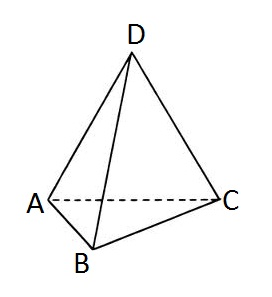\
В вершине тетраэдра D находится муравей. Муравей очень подвижный и не любит стоять на месте. В каждый момент времени он совершает один шаг от одной вершины к другой по некоторому ребру тетраэдра, оставаться на месте он не может.

От Вас в этой задаче требуется совсем немногое: нужно посчитать каким количеством способов муравей может прийти из исходной вершины D в себя ровно за n шагов. Другими словами, Вас просят узнать количество различных циклических путей длины n из вершины D в себя. Поскольку это количество может быть достаточно большим, ответ требуется посчитать по модулю \
1000000007 (109 + 7).

Входные данные
В первой строке записано единственное целое число n (1 ≤ n ≤ 107) — требуемая длина циклического пути.

Выходные данные\
Выведите единственное целое число — искомое количество способов по модулю \
1000000007 (109 + 7).

Примеры\
входные данные\
2\
выходные данные\
3\
входные данные\
4\
выходные данные\
21\
Примечание\
Искомые пути в первом примере:

D - A - D\
D - B - D\
D - C - D

In [39]:
#10 
def task10(n):
    mod = 1000000007
    #находясь в опредленной вершине, есть возможность перейти в 3 оставшиеся 
    x = pow(3, n, 4 * mod) # возведение 3**n (кол-во путей) по модулю 4 (кол-во вершин) * mod
    if n % 2 == 0: # в зависимости от четности кол-ва путей
        return (x + 3) // 4
    else:
        return (x - 3) // 4

n = input('Введите целое число n (1 ≤ n ≤ 10^7) — требуемая длина циклического пути.: ')
if not n.isdigit(): # является ли n целым числом
    print('Введенно не целое число!')
else:
    n = int(n)
    if not 1 <= n <= 10**7: # подходит ли n под требуемый диапазон
        print('Введенное число находится вне требуемого диапазона!')
    else: # если входные данные были введены корректно, вызывается функция task10
        res = task10(n)
            
print('Выходные данные:')                       
print(res)    


Введите целое число n (1 ≤ n ≤ 10^7) — требуемая длина циклического пути.: 4
Выходные данные:
21
